In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("crime.csv",encoding='ISO-8859-1')

In [3]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


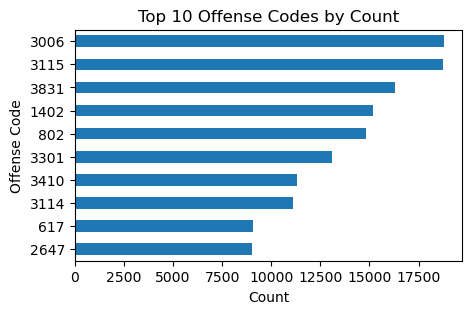

In [4]:
top_n = 10
offence_code_counts = df['OFFENSE_CODE'].value_counts().nlargest(top_n)

plt.figure(figsize=(5, 3))
offence_code_counts.sort_values().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Offense Code')
plt.title('Top {} Offense Codes by Count'.format(top_n))
plt.show()


3115 - Investigate Person   
3006 - SICK/INJURED/MEDICAL - PERSON     
3831 - M/V - LEAVING SCENE - PROPERTY DAMAGE    
1402 - VANDALISM    
802 - ASSAULT & BATTERY

In [5]:
df['OFFENSE_CODE_GROUP'].nunique()

67

In [6]:
df['OFFENSE_CODE_GROUP'].value_counts()

Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
Investigate Person                           18750
Other                                        18075
                                             ...  
HUMAN TRAFFICKING                                7
INVESTIGATE PERSON                               4
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Name: OFFENSE_CODE_GROUP, Length: 67, dtype: int64

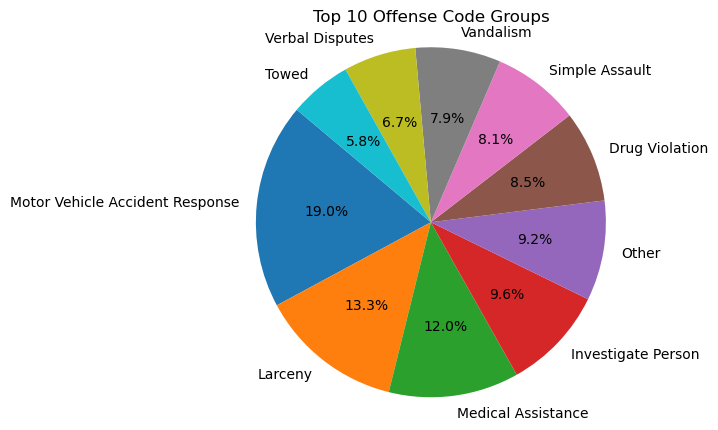

In [7]:
top_n = 10
offense_code_group_counts = df['OFFENSE_CODE_GROUP'].value_counts().nlargest(top_n)

plt.figure(figsize=(7,5))
plt.pie(offense_code_group_counts, labels=offense_code_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Top {} Offense Code Groups'.format(top_n))
plt.show()


In [8]:
df['DISTRICT'].value_counts()

B2     49945
C11    42530
D4     41915
A1     35717
B3     35442
C6     23460
D14    20127
E13    17536
E18    17348
A7     13544
E5     13239
A15     6505
Name: DISTRICT, dtype: int64

In [9]:
crimes_B2 = df[df['DISTRICT']=='B2']

In [10]:
crimes_B2.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,NaN,2018-09-03 20:39:37,2018,9,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)"
18,I182070917,2647,Other,THREATS TO DO BODILY HARM,B2,901,NaN,2018-09-03 19:52:00,2018,9,Monday,19,Part Two,HORADAN WAY,42.333717,-71.096658,"(42.33371742, -71.09665806)"
19,I182070915,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,B2,181,NaN,2018-09-02 18:00:00,2018,9,Sunday,18,Part One,SHIRLEY ST,42.325695,-71.068168,"(42.32569490, -71.06816778)"
24,I182070908,522,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,B2,911,NaN,2018-09-03 18:38:00,2018,9,Monday,18,Part One,ANNUNCIATION RD,42.335062,-71.093168,"(42.33506218, -71.09316781)"


In [11]:
crimes_B2['REPORTING_AREA'].value_counts()

       3384
329    1874
319    1153
326    1121
281    1117
       ... 
529       1
573       1
84        1
908       1
94        1
Name: REPORTING_AREA, Length: 167, dtype: int64

In district B2, Reporting Area ' ' has the maximum no of crimes i.e. 1158

In [12]:
# Group the DataFrame by 'DISTRICT' and find the reporting area with max crime in each district
max_reporting_areas = df.groupby('DISTRICT')['REPORTING_AREA'].apply(lambda x: x.value_counts().idxmax())

# Print the resulting Series showing the reporting area with max crime in each district
print(max_reporting_areas)


DISTRICT
A1        
A15    900
A7      26
B2        
B3     465
C11       
C6     186
D14    796
D4        
E13    572
E18    520
E5     822
Name: REPORTING_AREA, dtype: object


In [13]:
df['SHOOTING'].fillna('Not a Shooting', inplace=True)

# Filter rows where 'shooting' column is not NaN
shooting_df = df[df['SHOOTING'] != 'Not a Shooting']

# Group the filtered DataFrame by 'occurred_on_date' and count the number of shootings on each date
shooting_counts_by_date = shooting_df.groupby('OCCURRED_ON_DATE').size()

# Find the date with the maximum number of shootings
max_shooting_date = shooting_counts_by_date.idxmax()
max_shooting_count = shooting_counts_by_date.max()

print(f"On {max_shooting_date}, the maximum number of shootings occurred with {max_shooting_count} incidents.")


On 2016-08-20 00:05:00, the maximum number of shootings occurred with 7 incidents.


On 2016-08-20 00:05:00, the maximum number of shootings occurred with 7 incidents.

In [14]:
# Group the DataFrame by 'occurred_on_date' and count the number of crimes on each date
crime_counts_by_date = df.groupby('OCCURRED_ON_DATE').size()

# Find the date with the maximum number of crimes
max_crime_date = crime_counts_by_date.idxmax()
max_crime_count = crime_counts_by_date.max()

# Find the date with the minimum number of crimes
min_crime_date = crime_counts_by_date.idxmin()
min_crime_count = crime_counts_by_date.min()

print(f"On {max_crime_date}, the maximum number of crimes occurred with {max_crime_count} incidents.")
print(f"On {min_crime_date}, the minimum number of crimes occurred with {min_crime_count} incidents.")


On 2017-06-01 00:00:00, the maximum number of crimes occurred with 29 incidents.
On 2015-06-15 00:03:00, the minimum number of crimes occurred with 1 incidents.


In [15]:
df['MONTH'].value_counts()

8     34823
7     34556
6     30568
9     26543
5     26199
10    25737
3     24146
4     24086
11    23675
1     23610
12    23477
2     21653
Name: MONTH, dtype: int64

Maximum crimes in August and Least in February



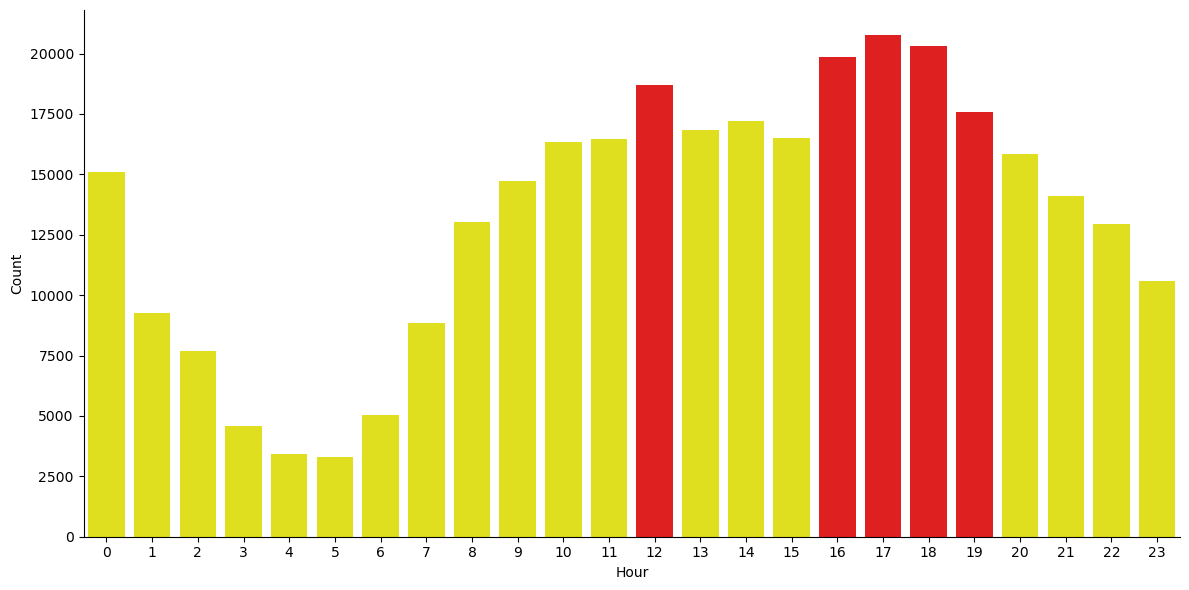

In [16]:
top_hours = df['HOUR'].value_counts().nlargest(5).index

# Sort the unique hours in sequential order
sequential_order = sorted(df['HOUR'].unique())

# Crimes by hour of the day
sns.catplot(x='HOUR',
            kind='count',
            height=6,
            aspect=2,
            palette=['red' if hour in top_hours else 'yellow' for hour in sequential_order],
            order=sequential_order,  # Specify the order of x-axis values
            data=df)

plt.xticks(size=10)
plt.yticks(size=10)
plt.xlabel('Hour', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.show()

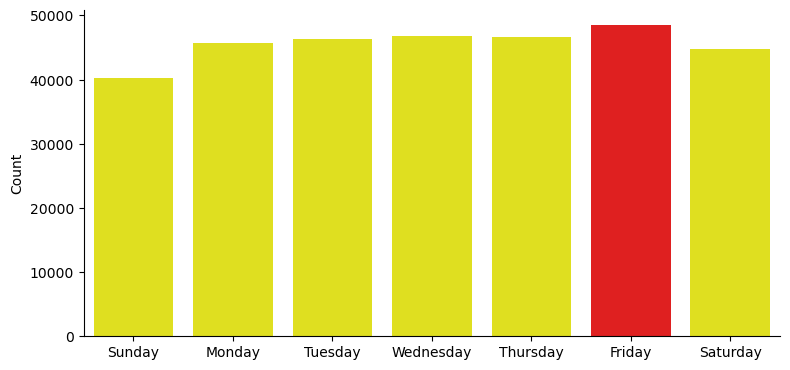

In [17]:
top_day = df['DAY_OF_WEEK'].value_counts().nlargest(1).index

# Sort the days in sequential order
sequential_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Crimes by day of the week
sns.catplot(x='DAY_OF_WEEK',
            kind='count',
            height=4,
            aspect=2,
            palette=['red' if day in top_day else 'yellow' for day in sequential_order],
            order=sequential_order,  # Specify the order of x-axis values
            data=df)

plt.xticks(size=10)
plt.yticks(size=10)
plt.xlabel('')
plt.ylabel('Count', fontsize=10)

plt.show()

In [18]:
file_path = 'crime.csv'
data = pd.read_csv(file_path, encoding='latin-1')

In [19]:
#Treating missing values
for column in df.columns:
    if df[column].dtype == 'float64':
        df[column].fillna(df[column].mean(), inplace=True)
    elif df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)

df.isnull().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
SHOOTING               0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

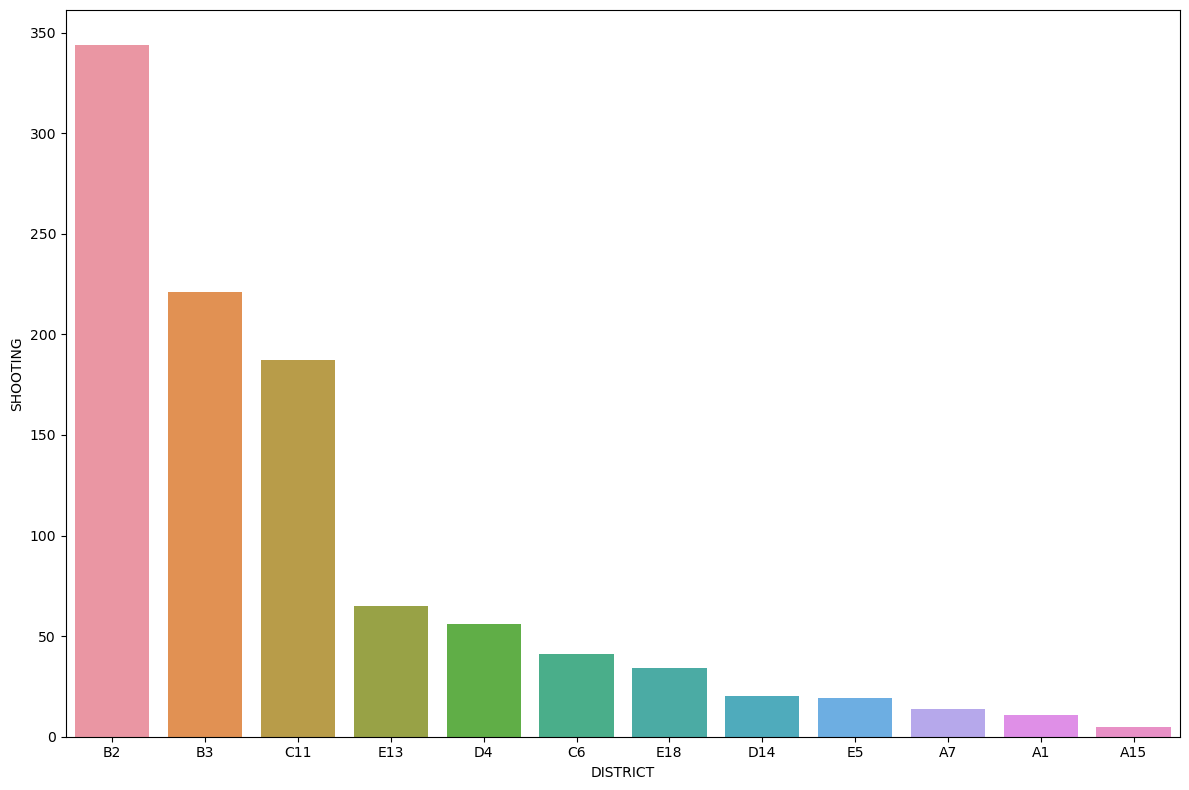

In [20]:
#District-wise shooting occurred
shootingOccurred = data[data["SHOOTING"] == "Y"].groupby("DISTRICT").agg("SHOOTING").count().reset_index().sort_values("SHOOTING", ascending=False)
shootingOccurred
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.barplot(x=shootingOccurred.DISTRICT, y=shootingOccurred.SHOOTING, data=shootingOccurred)
plt.tight_layout()
plt.show()

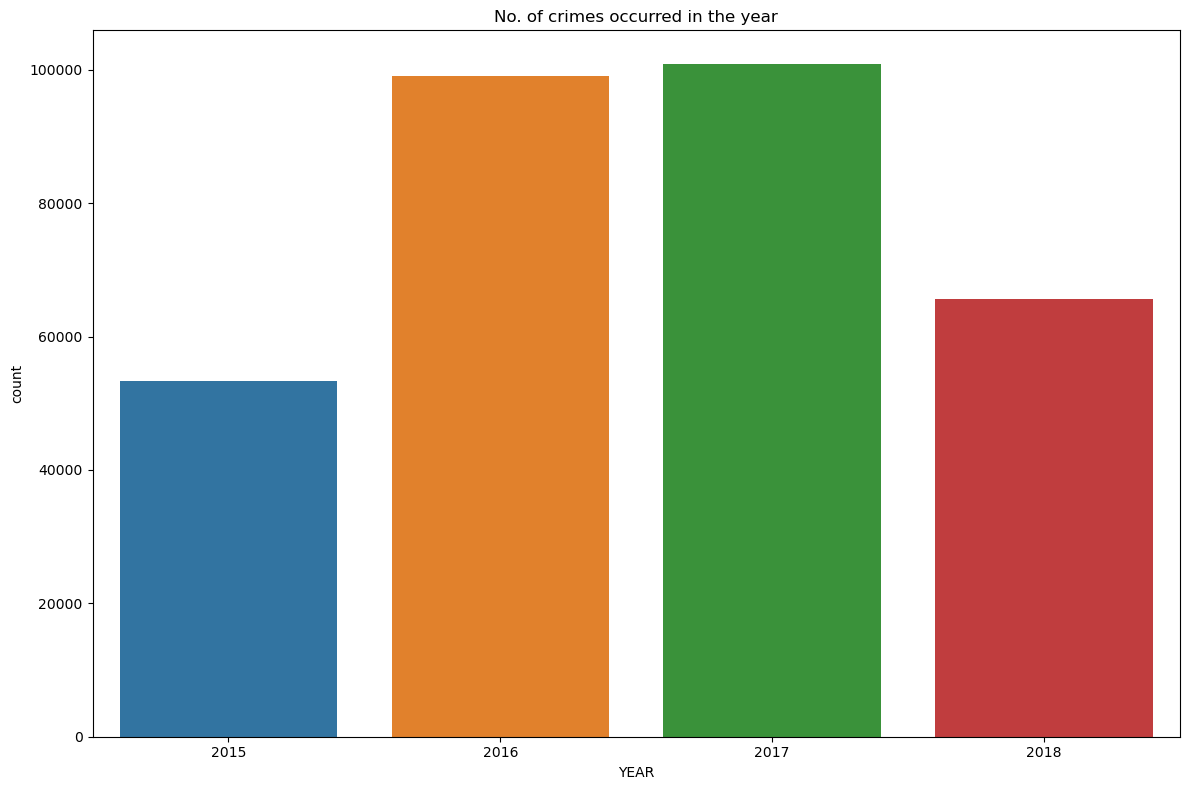

In [21]:
#year-wise crime
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
sns.countplot(x="YEAR", data=data)
ax.set_title("No. of crimes occurred in the year")
plt.tight_layout()
plt.show()

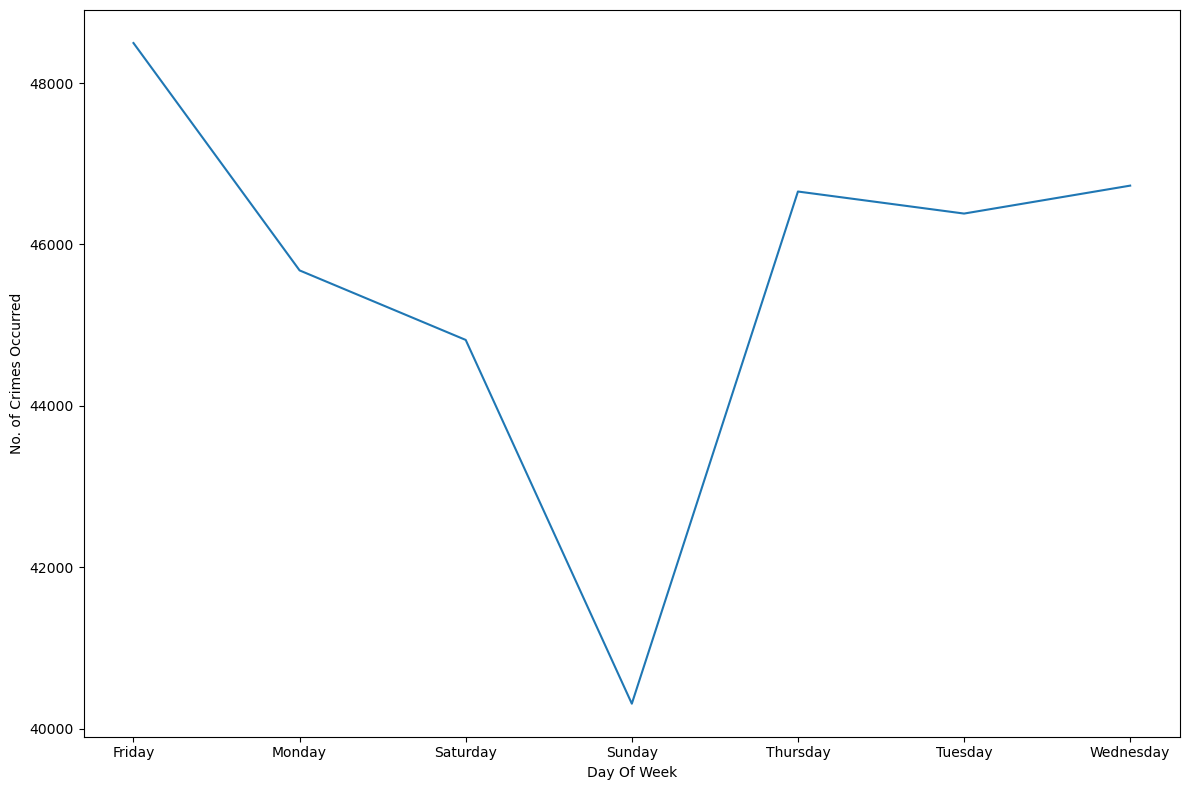

In [22]:
#Most crimes occurred in which day?
df = data.groupby(["DAY_OF_WEEK"])["OFFENSE_CODE"].count().reset_index()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p=sns.lineplot(x=df.iloc[:,0], y=df.iloc[:,1], data=df)
p.set_ylabel("No. of Crimes Occurred")
p.set_xlabel("Day Of Week")
plt.tight_layout()
plt.show()

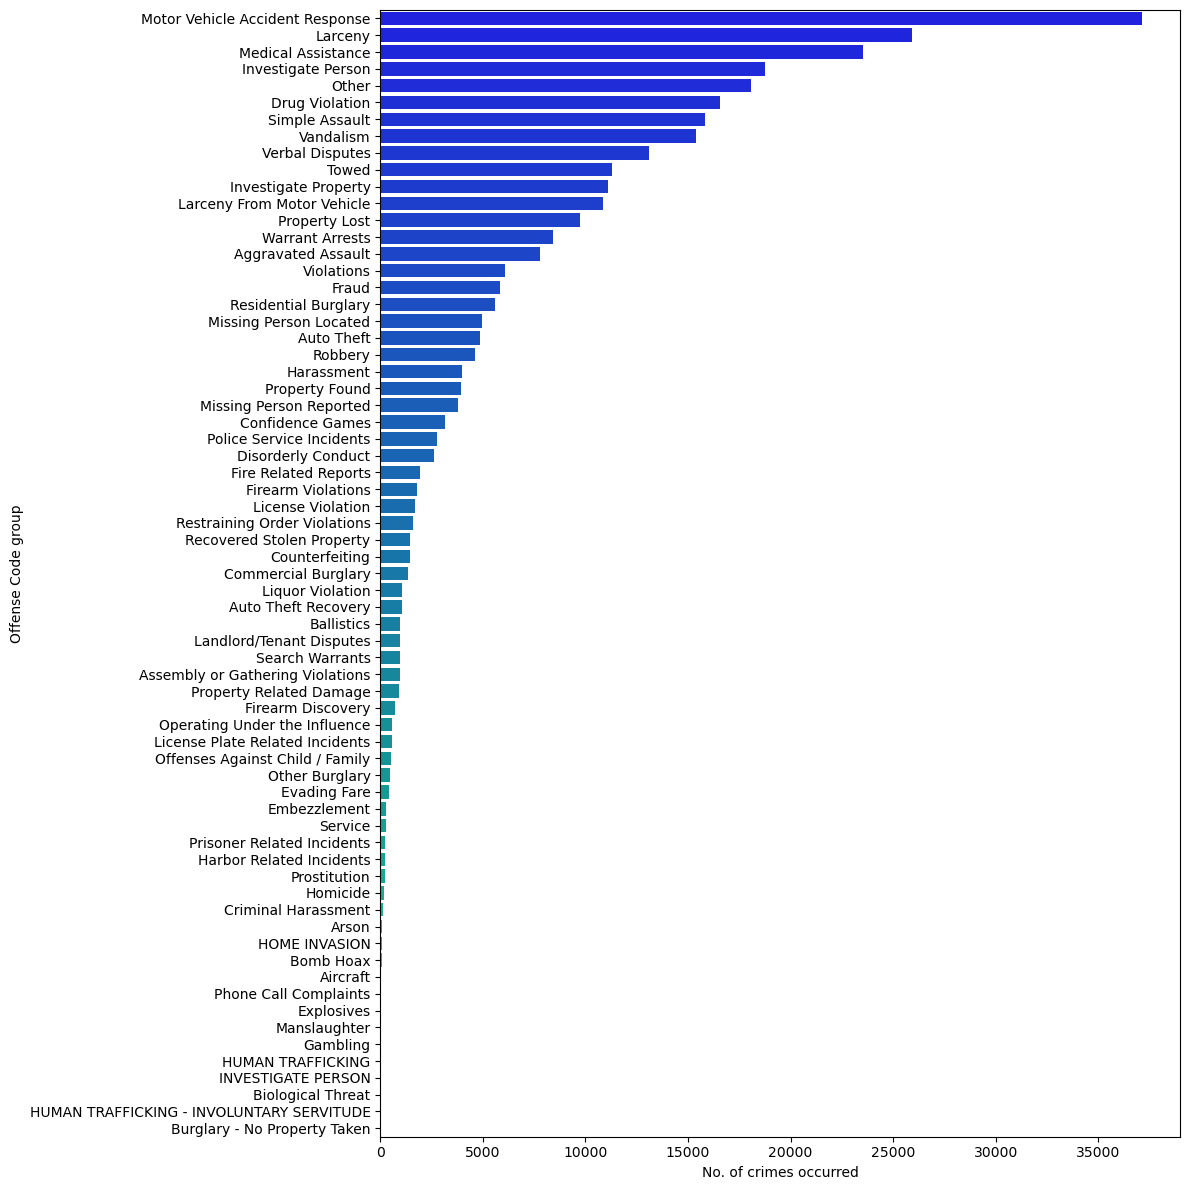

In [23]:
#Based on OFFENSE_CODE_GROUP
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
d = data["OFFENSE_CODE_GROUP"].value_counts().reset_index()
p = sns.barplot(x=d.iloc[:,1], y=d.iloc[:,0], data=d, palette="winter")
p.set_xlabel("No. of crimes occurred")
p.set_ylabel("Offense Code group")
plt.tight_layout()
plt.show()

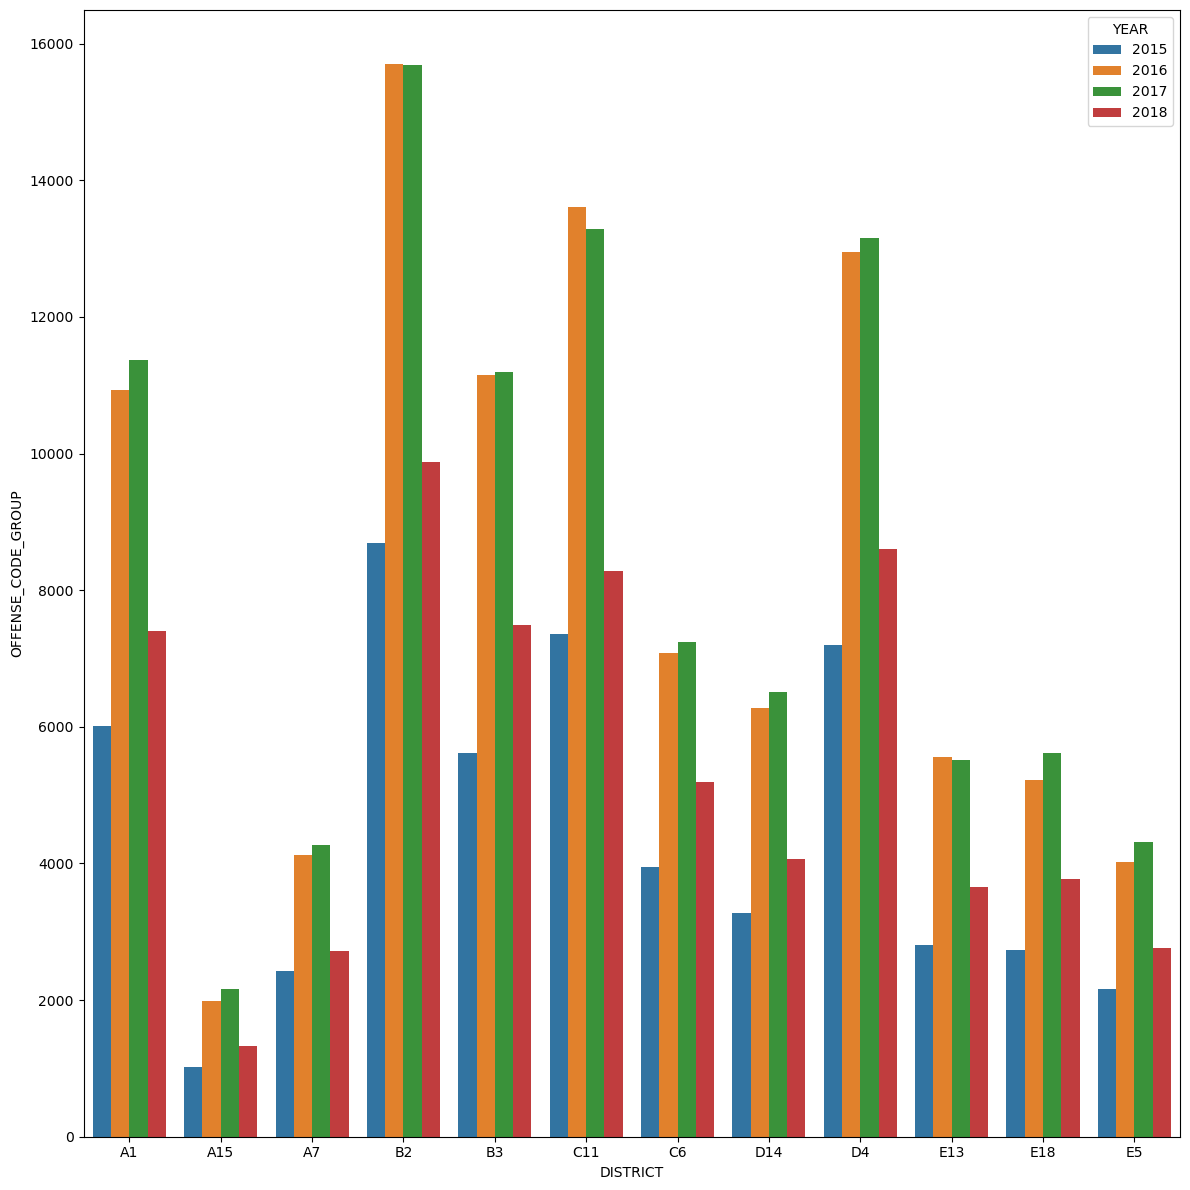

In [24]:
#No.of Offense occurred by district and year
df = data.groupby(["YEAR","DISTRICT"])["OFFENSE_CODE_GROUP"].count().reset_index()
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
p = sns.barplot(x="DISTRICT", y="OFFENSE_CODE_GROUP", hue="YEAR", data=df, ax=ax)
plt.tight_layout()
plt.show()

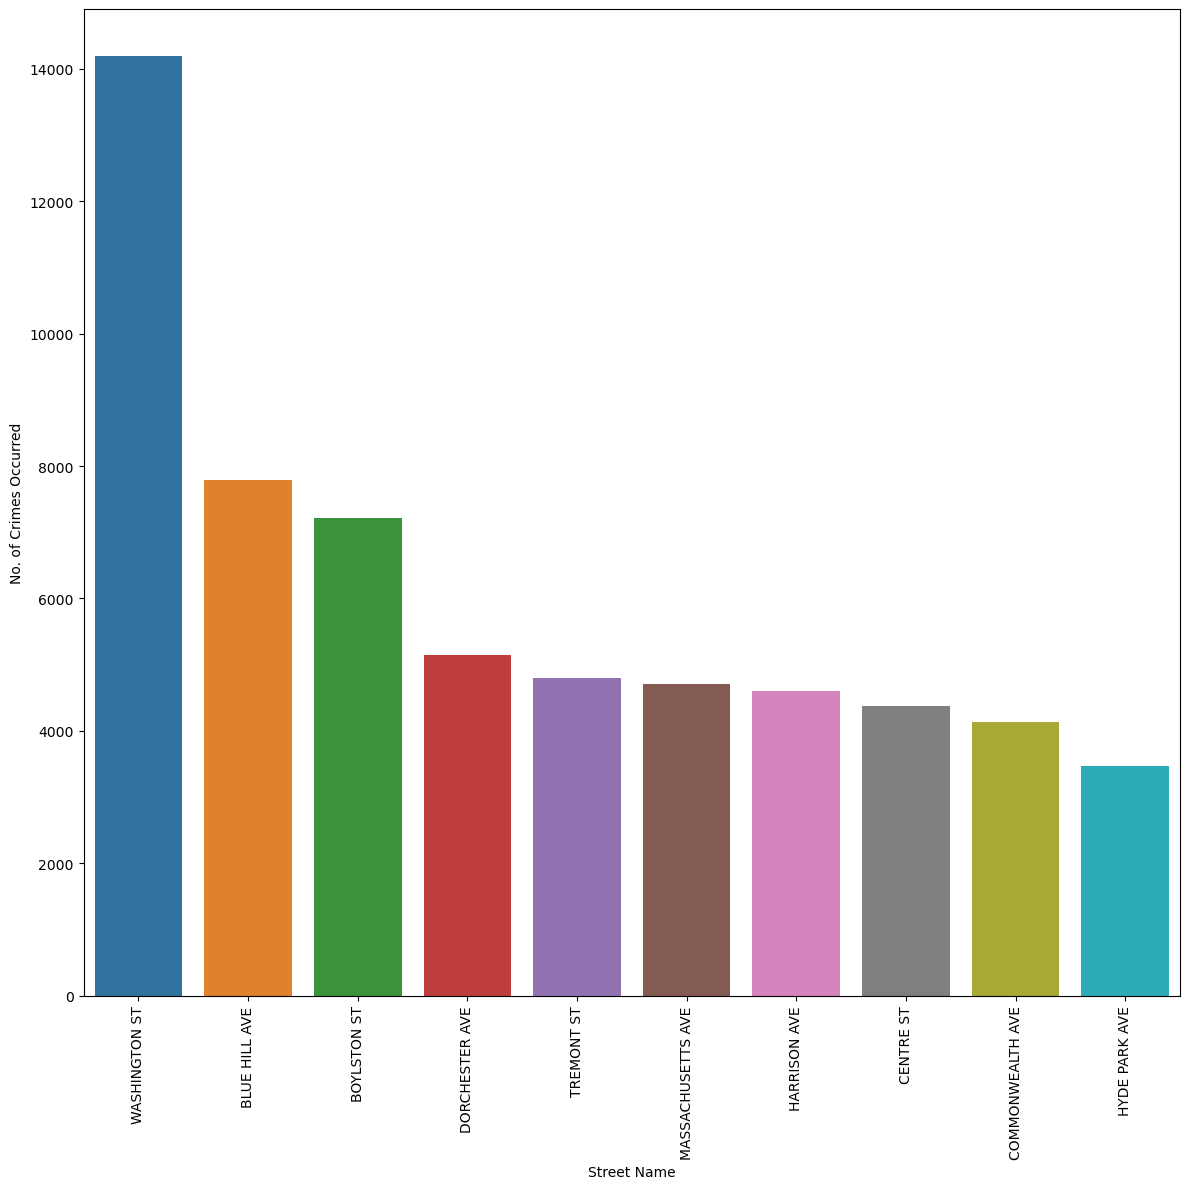

In [25]:
#Top 10 most crime occurred street
df = data["STREET"].value_counts().head(10).reset_index()
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
p = sns.barplot(x=df.iloc[:,0], y=df["STREET"], data=df)#, palette="spring")
p.set_ylabel("No. of Crimes Occurred")
p.set_xlabel("Street Name")
p.set_xticklabels(p.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

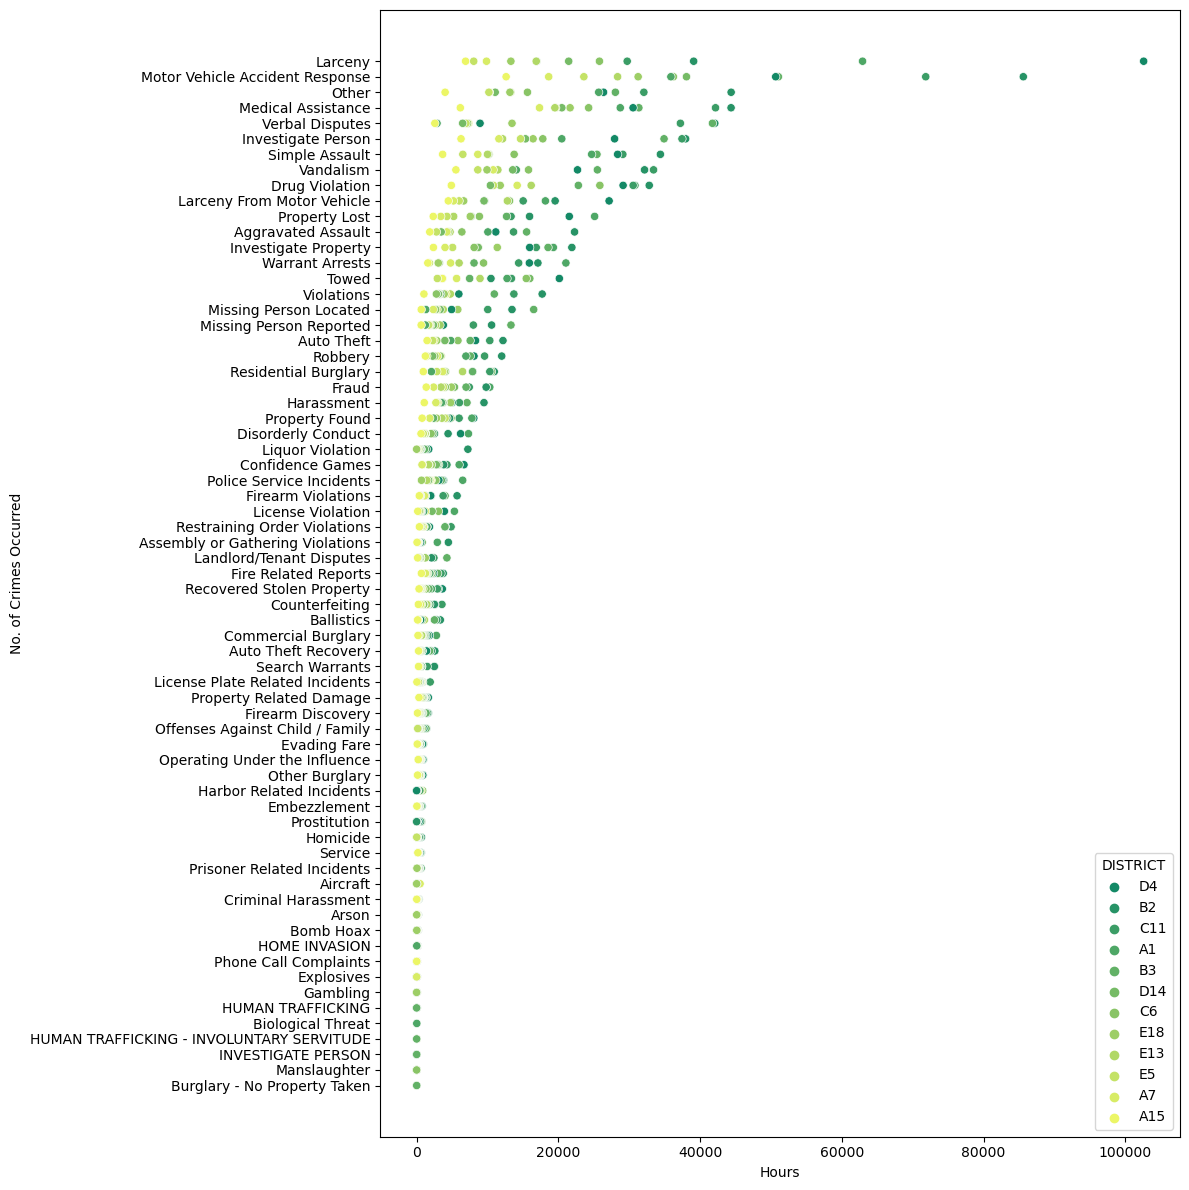

In [26]:
#No. of hours spent on each Offence by district
df = data.groupby(["DISTRICT", "OFFENSE_CODE_GROUP"])["HOUR"].sum().reset_index().sort_values("HOUR", ascending=False)
df
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
p = sns.scatterplot(x="HOUR", y="OFFENSE_CODE_GROUP", hue="DISTRICT", data=df, palette="summer")
p.set_ylabel("No. of Crimes Occurred")
p.set_xlabel("Hours")
plt.tight_layout()
plt.show()

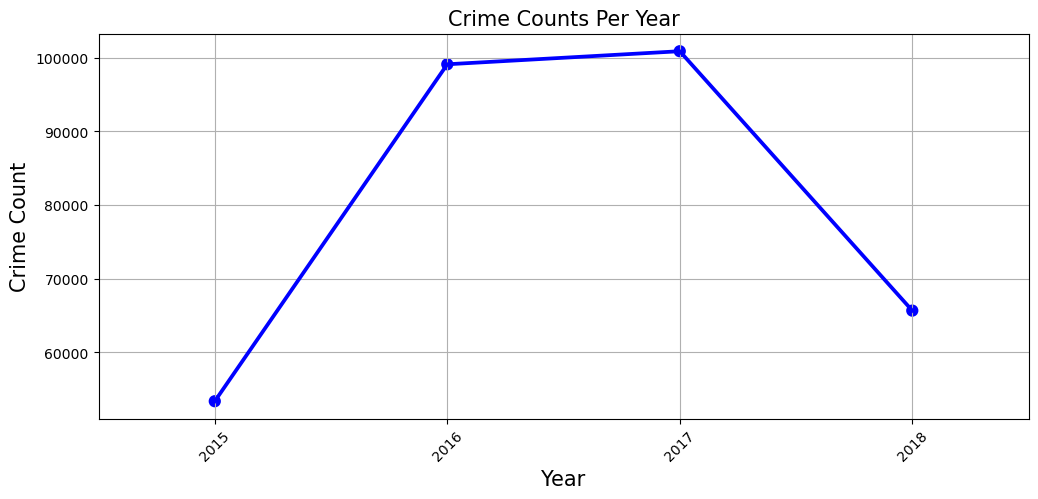

In [27]:
#Crime counts per year
#In the chart below, we see the sums of the number of crimes committed each year.
year_count = []
for year in  data['YEAR'].unique():
    year_count.append(len( data[ data['YEAR'] == year]))

# Plot the crime counts per year
plt.figure(figsize=(12, 5))
sns.pointplot(x= data['YEAR'].unique(), y=year_count, color='blue')
plt.xlabel('Year', fontsize=15)
plt.xticks(rotation=45)
plt.ylabel('Crime Count', fontsize=15)
plt.title('Crime Counts Per Year', fontsize=15)
plt.grid()
plt.show()

In [33]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from IPython.display import HTML, IFrame, display

In [34]:
def loaddata():
    crimes = pd.read_csv('crime.csv', encoding='latin')
    crimes.dropna(subset=['Lat', 'Long', 'DISTRICT'], inplace=True)

    # Focus on major crimes in 2018:
    crimes = crimes[crimes['OFFENSE_CODE_GROUP'].isin([
        'Aggravated Assault', 'Arson', 'Auto Theft', 'Ballistics', 'Commercial Burglary',
        'Criminal Harassment', 'HOME INVASION', 'Harassment', 'Homicide', 'Larceny',
        'Larceny From Motor Vehicle', 'Manslaughter', 'Other Burglary',
        'Residential Burglary', 'Robbery', 'Simple Assault'])]
    crimes = crimes[crimes['YEAR'] == 2018]
    return crimes

In [35]:
def embed_map(m, file_name):
    m.save(file_name)
    iframe = f'<iframe src={file_name} width=300% height=500></iframe> '
    display(HTML(iframe))

In [36]:
def crimes_heatmap(crimes):
    # Base map with center in Boston.
    m_5 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=12)

    # Add a heatmap to the base map
    HeatMap(data=crimes[['Lat', 'Long']], radius=10).add_to(m_5)

# Display the map
    embed_map(m_5, 'm_5.html')

In [37]:
 crime_data = loaddata()

In [38]:
crimes_heatmap(crime_data)

In [39]:
data = pd.read_csv('crime.csv', encoding='latin')

In [40]:
# rename columns
data.rename(columns = {"INCIDENT_NUMBER": "Incident_Number", 
                     "OFFENSE_CODE":"Offense_Code","OFFENSE_CODE_GROUP":"Offense_Code_Group","OFFENSE_DESCRIPTION":"Offense_Description",
                     "DISTRICT": "District","REPORTING_AREA": "Reporting_Area","SHOOTING": "Shooting",
                     "OCCURRED_ON_DATE": "Occurred_On_Date","YEAR": "Year","MONTH": "Month",
                     "DAY_OF_WEEK": "Day_Of_Week","HOUR": "Hour","UCR_PART": "Ucr_Part",
                     "STREET": "Street"
                     }, 
                                 inplace = True) 
data["Occurred_On_Date"] = data["Occurred_On_Date"].apply(pd.to_datetime, errors='coerce')
data["Occurred_On_Date"] = data["Occurred_On_Date"].dt.date
data["Occurred_On_Date"] = data["Occurred_On_Date"].apply(pd.to_datetime, errors='coerce')
data.Shooting.fillna('N', inplace=True)
data=data.dropna()
def getSeason(month):
    if (month == 12 or month == 1 or month == 2):
       return "Winter"
    elif(month == 3 or month == 4 or month == 5):
       return "Spring"
    elif(month ==6 or month==7 or month == 8):
       return "Summer"
    else:
       return "Fall"
        


In [41]:
data['Season'] = data.Month.apply(getSeason)
data['Day'] = 0
data['Night'] = 0
# Day or night for 1st month
data['Day'].loc[(data['Hour'] >= 6) & (data['Hour'] <= 18)] = 1
data['Night'].loc[data['Day']==0]=1

C:\Users\aditi\AppData\Local\Temp\ipykernel_20820\1224411612.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Day'].loc[(data['Hour'] >= 6) & (data['Hour'] <= 18)] = 1
C:\Users\aditi\AppData\Local\Temp\ipykernel_20820\1224411612.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Night'].loc[data['Day']==0]=1


C:\Users\aditi\AppData\Local\Temp\ipykernel_20820\2164443499.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,4, num)


Text(0.1, 0.95, 'Changes in most frequent crimes over time from 2015 to 2018')

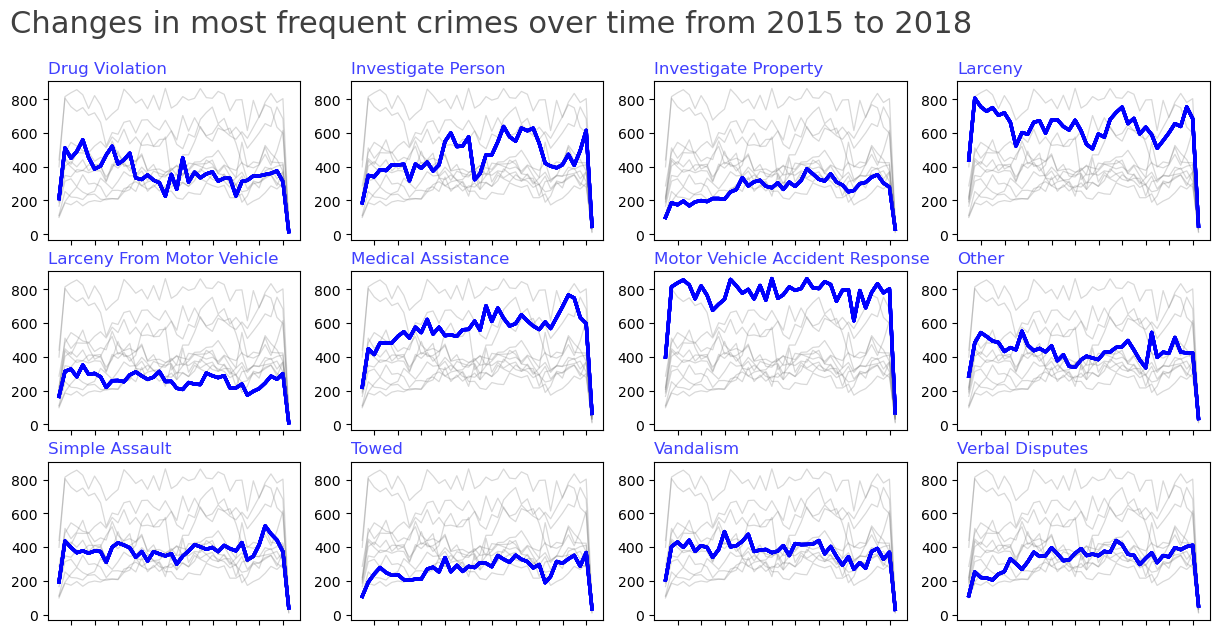

In [42]:
ten_freq_crimes = data["Offense_Code_Group"].value_counts()[:12]
df_top_crimes = data[data["Offense_Code_Group"].isin(ten_freq_crimes.index)]
df_tp = df_top_crimes.pivot_table(index=df_top_crimes["Occurred_On_Date"],
                                                      columns=["Offense_Code_Group"],aggfunc="size", fill_value=0).resample("M").sum()

#palette = plt.get_cmap('Set2')
num=0
ax,fix = plt.subplots(figsize=(15,7))
for column in df_tp:
    num+=1
    plt.subplot(3,4, num)
    for v in df_tp:
        plt.plot(df_tp.index,v,data=df_tp,marker='', color='grey', linewidth=0.9, alpha=0.3)
        plt.tick_params(labelbottom=False)
        plt.plot(df_tp.index,column, data=df_tp,color="blue", linewidth=2.4, alpha=0.75, label=column)
        plt.title(column, loc='left', fontsize=12, fontweight=0, color="blue", alpha=0.75)
ax.text(x=0.1,y=0.95,s="Changes in most frequent crimes over time from 2015 to 2018",alpha=0.75, fontsize=22)

# Linear regression model

In [45]:
from sklearn import preprocessing
import datetime as dt   

from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [43]:
def isShooting(dataFrame):
    dataFrame["Shooting"] = dataFrame["Shooting"].apply(lambda x: 1 if x == "Y" else 0)
    return dataFrame
data = isShooting(data)

In [44]:
data["DayOfWeek"] = data["Day_Of_Week"].map({
    "Monday":1,
    "Tuesday":2,
    "Wednesday":3,
    "Thursday":4,
    "Friday":5,
    "Saturday":6,
    "Sunday":7
})

In [46]:
# Fall:0 , Spring: 1 , Summer: 2 , Winter:3
le = preprocessing.LabelEncoder()
data['Seasons'] = le.fit_transform(data['Season'])

In [47]:
data = data.drop("Season", axis = 1)

In [48]:
# 'Part One', 'Part Three', 'Part Two', 'Other' lerin anlamlı olarak değişmesini istediğim için label encodingle değil mapleyerek oluşturdum.
data["Ucr_Parts"] = data["Ucr_Part"].map({
    "Part One":1,
    "Part Two":2,
    "Part Three":3,
    "Other":0
})

In [49]:
data = data.drop("Ucr_Part", axis = 1)

In [50]:
data = data.sort_values(by =['Occurred_On_Date'], ascending=False)
data[[  'District', 'Shooting','Occurred_On_Date', 'Year', 'Month', 'Day_Of_Week', 'Hour',  'Night', 'DayOfWeek', 'Seasons','Ucr_Parts']]

,District,Shooting,Occurred_On_Date,Year,Month,Day_Of_Week,Hour,Night,DayOfWeek,Seasons,Ucr_Parts
149,B2,0,2018-09-03,2018,9,Monday,9,0,1,0,3
137,E18,0,2018-09-03,2018,9,Monday,10,0,1,0,3
127,C11,0,2018-09-03,2018,9,Monday,11,0,1,0,2
128,C11,0,2018-09-03,2018,9,Monday,11,0,1,0,3
129,A1,0,2018-09-03,2018,9,Monday,11,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...
318627,D4,0,2015-06-15,2015,6,Monday,10,0,1,2,3
318626,D4,0,2015-06-15,2015,6,Monday,0,1,1,2,1
318625,D4,0,2015-06-15,2015,6,Monday,12,0,1,2,3
318624,B2,0,2015-06-15,2015,6,Monday,12,0,1,2,3


In [51]:
dataR = pd.DataFrame(data.groupby(["Occurred_On_Date","District"])["Incident_Number"].count()).reset_index()
dataR.tail()

,Occurred_On_Date,District,Incident_Number
14104,2018-09-03,D14,9
14105,2018-09-03,D4,20
14106,2018-09-03,E13,4
14107,2018-09-03,E18,10
14108,2018-09-03,E5,3


In [52]:
dataR.Occurred_On_Date.nunique()

1177

In [53]:
dataR.isnull().sum() 

Occurred_On_Date    0
District            0
Incident_Number     0
dtype: int64

In [54]:
dataR['Day'] = dataR['Occurred_On_Date'].dt.dayofweek
days = ( 1,2,3,4,5,6,7) # starts w monday
dataR['Day'] = dataR['Day'].apply(lambda x: days[x])

In [55]:
dataR.rename(columns={'Occurred_On_Date': 'OccuredDate', 'Incident_Number': 'CaseCount', 'Day': 'DayOfWeek'}, inplace=True)

In [56]:
dataR = pd.concat([dataR,pd.get_dummies(dataR['District'], prefix='D')],axis=1)

# now drop the original 'country' column (you don't need it anymore)
dataR.drop(['District'],axis=1, inplace=True)

In [57]:
dataR["D_A1"] = np.int64(dataR["D_A1"])                      # convert uint8 to int64
dataR["D_A15"] = np.int64(dataR["D_A15"])
dataR["D_A7"] = np.int64(dataR["D_A7"])
dataR["D_B2"] = np.int64(dataR["D_B2"])
dataR["D_B3"] = np.int64(dataR["D_B3"])
dataR["D_C11"] = np.int64(dataR["D_C11"])
dataR["D_C6"] = np.int64(dataR["D_C6"])
dataR["D_D14"] = np.int64(dataR["D_D14"])
dataR["D_D4"] = np.int64(dataR["D_D4"])
dataR["D_E13"] = np.int64(dataR["D_E13"])
dataR["D_E18"] = np.int64(dataR["D_E18"])
dataR["D_E5"] = np.int64(dataR["D_E5"])

In [58]:
dataR['OccuredDate'] = pd.to_datetime(dataR['OccuredDate'])
dataR['OccuredDate'] = dataR['OccuredDate'].map(dt.datetime.toordinal)

In [59]:
dataD4 = data.loc[data['District'] == "D4"]
dataD4 = dataD4.loc[:, ["Incident_Number",'Offense_Code_Group', 'District', 'Occurred_On_Date']]
dataD4 = pd.DataFrame(dataD4.groupby(["Occurred_On_Date","District"])["Incident_Number"].count()).reset_index()
dataD4.rename(columns={ 'Incident_Number': 'countD4','Occurred_On_Date': "DateD4"}, inplace=True)
dataD4 = dataD4.drop("District",axis = 1)

In [60]:
dataD14 = data.loc[data['District'] == "D14"]
dataD14 = dataD14.loc[:, ["Incident_Number",'Offense_Code_Group', 'District', 'Occurred_On_Date']]
dataD14 = pd.DataFrame(dataD14.groupby(["Occurred_On_Date","District"])["Incident_Number"].count()).reset_index()
dataD14.rename(columns={ 'Incident_Number': 'countD14','Occurred_On_Date': "DateD14"}, inplace=True)
dataD14 = dataD14.drop("District",axis = 1)

In [61]:
dataC11 = data.loc[data['District'] == "C11"]
dataC11 = dataC11.loc[:, ["Incident_Number",'Offense_Code_Group', 'District', 'Occurred_On_Date']]
dataC11 = pd.DataFrame(dataC11.groupby(["Occurred_On_Date","District"])["Incident_Number"].count()).reset_index()
dataC11.rename(columns={ 'Incident_Number': 'countC11','Occurred_On_Date': "DateC11"}, inplace=True)
dataC11 = dataC11.drop("District",axis = 1)

In [62]:
dataB3 = data.loc[data['District'] == "B3"]
dataB3 = dataB3.loc[:, ["Incident_Number",'Offense_Code_Group', 'District', 'Occurred_On_Date']]
dataB3 = pd.DataFrame(dataB3.groupby(["Occurred_On_Date","District"])["Incident_Number"].count()).reset_index()
dataB3.rename(columns={ 'Incident_Number': 'countB3', 'Occurred_On_Date': "DateB3"}, inplace=True)
dataB3 = dataB3.drop("District",axis = 1)
dataB2 = data.loc[data['District'] == "B2"]
dataB2 = dataB2.loc[:, ["Incident_Number",'Offense_Code_Group', 'District', 'Occurred_On_Date']]
dataB2 = pd.DataFrame(dataB2.groupby(["Occurred_On_Date","District"])["Incident_Number"].count()).reset_index()
dataB2.rename(columns={ 'Incident_Number': 'countB2','Occurred_On_Date': "DateB2"}, inplace=True)
dataB2 = dataB2.drop("District",axis = 1)
dataC6 = data.loc[data['District'] == "C6"]
dataC6 = dataC6.loc[:, ["Incident_Number",'Offense_Code_Group', 'District', 'Occurred_On_Date']]
dataC6 = pd.DataFrame(dataC6.groupby(["Occurred_On_Date","District"])["Incident_Number"].count()).reset_index()
dataC6.rename(columns={ 'Incident_Number': 'countC6','Occurred_On_Date': "DateC6"}, inplace=True)
dataC6 = dataC6.drop("District",axis = 1)
dataA1 = data.loc[data['District'] == "A1"]
dataA1 = dataA1.loc[:, ["Incident_Number",'Offense_Code_Group', 'District', 'Occurred_On_Date']]
dataA1 = pd.DataFrame(dataA1.groupby(["Occurred_On_Date","District"])["Incident_Number"].count()).reset_index()
dataA1.rename(columns={ 'Incident_Number': 'countA1','Occurred_On_Date': "DateA1"}, inplace=True)
dataA1 = dataA1.drop("District",axis = 1)
dataE5 = data.loc[data['District'] == "E5"]
dataE5 = dataE5.loc[:, ["Incident_Number",'Offense_Code_Group', 'District', 'Occurred_On_Date']]
dataE5 = pd.DataFrame(dataE5.groupby(["Occurred_On_Date","District"])["Incident_Number"].count()).reset_index()
dataE5.rename(columns={ 'Incident_Number': 'countE5','Occurred_On_Date': "DateE5"}, inplace=True)
dataE5 = dataE5.drop("District",axis = 1)
dataA7 = data.loc[data['District'] == "A7"]
dataA7 = dataA7.loc[:, ["Incident_Number",'Offense_Code_Group', 'District', 'Occurred_On_Date']]
dataA7 = pd.DataFrame(dataA7.groupby(["Occurred_On_Date","District"])["Incident_Number"].count()).reset_index()
dataA7.rename(columns={ 'Incident_Number': 'countA7','Occurred_On_Date': "DateA7"}, inplace=True)
dataA7 = dataA7.drop("District",axis = 1)
dataE13 = data.loc[data['District'] == "E13"]
dataE13 = dataE13.loc[:, ["Incident_Number",'Offense_Code_Group', 'District', 'Occurred_On_Date']]
dataE13 = pd.DataFrame(dataE13.groupby(["Occurred_On_Date","District"])["Incident_Number"].count()).reset_index()
dataE13.rename(columns={ 'Incident_Number': 'countE13','Occurred_On_Date': "DateE13"}, inplace=True)
dataE13 = dataE13.drop("District",axis = 1)
dataE18 = data.loc[data['District'] == "E18"]
dataE18 = dataE18.loc[:, ["Incident_Number",'Offense_Code_Group', 'District', 'Occurred_On_Date']]
dataE18 = pd.DataFrame(dataE18.groupby(["Occurred_On_Date","District"])["Incident_Number"].count()).reset_index()
dataE18.rename(columns={ 'Incident_Number': 'countE18', 'Occurred_On_Date': "DateE18"}, inplace=True)
dataE18 = dataE18.drop("District",axis = 1)
dataA15 = data.loc[data['District'] == "A15"]
dataA15 = dataA15.loc[:, ["Incident_Number",'Offense_Code_Group', 'District', 'Occurred_On_Date']]
dataA15 = pd.DataFrame(dataA15.groupby(["Occurred_On_Date","District"])["Incident_Number"].count()).reset_index()
dataA15.rename(columns={ 'Incident_Number': 'countA15','Occurred_On_Date': "DateA15"}, inplace=True)
dataA15 = dataA15.drop("District",axis = 1)

In [63]:
dataUCR = data.loc[data['Ucr_Parts'] == 3]
dataUCR = dataUCR.loc[:, ["Incident_Number", 'Ucr_Parts', 'Occurred_On_Date']]
dataUCR = pd.DataFrame(dataUCR.groupby(["Occurred_On_Date","Ucr_Parts"])["Incident_Number"].count()).reset_index()
dataUCR.rename(columns={ 'Incident_Number': 'count','Occurred_On_Date': "DateUCR"}, inplace=True)
dataUCR = dataUCR.drop("Ucr_Parts",axis = 1)
dataUCR

,DateUCR,count
0,2015-06-15,116
1,2015-06-16,108
2,2015-06-17,90
3,2015-06-18,141
4,2015-06-19,116
...,...,...
1172,2018-08-30,126
1173,2018-08-31,138
1174,2018-09-01,142
1175,2018-09-02,111


In [64]:
result = pd.concat([dataUCR,dataD14, dataC11, dataD4, dataB3,dataB2,dataC6, dataA1, dataE5, dataA7, dataE13,
       dataE18, dataA15], axis=1, sort=False)
result = result.drop(["DateUCR",'DateC11','DateD4', 'DateB3',  'DateB2','DateC6',  'DateA1', 'DateE5',  'DateA7',  'DateE13','DateE18',  'DateA15'] ,axis = 1)
result.isnull().sum()

count        0
DateD14      0
countD14     0
countC11     0
countD4      0
countB3      0
countB2      0
countC6      0
countA1      0
countE5      0
countA7      0
countE13     0
countE18     0
countA15    15
dtype: int64

In [65]:
result["countA15"] = result["countA15"].fillna(result["countA15"].mean())

In [66]:
result['DayofMonth'] = result['DateD14'].dt.day
result['Month'] = result['DateD14'].dt.month
result['Weekday'] = result['DateD14'].dt.weekday

In [67]:
result['DateD14'] = pd.to_datetime(result['DateD14'])
result['DateD14'] = result['DateD14'].map(dt.datetime.toordinal)
x_trainUCR, x_testUCR, y_trainUCR, y_testUCR = train_test_split(result.drop(columns=["count"]), result["count"], random_state = 42)  

In [70]:
lr = LinearRegression().fit(x_trainUCR,y_trainUCR)

y_train_predUCR = lr.predict(x_trainUCR)
y_test_predUCR = lr.predict(x_testUCR)

print("Accuracy score = ",lr.score(x_testUCR,y_testUCR))

Accuracy score =  0.6659677025799651


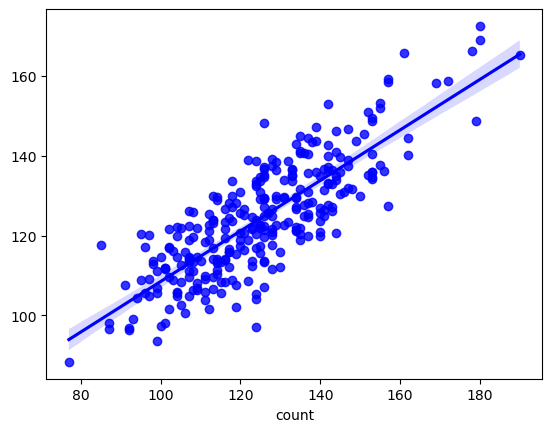

In [71]:
ax = sns.regplot(x=y_testUCR, y=y_test_predUCR, color="b")
